# DBSCAN聚类算法
* 核心对象：r邻域内的点数量达到一定阈值minPts的点，称为核心点
* 距离阈值：r
* 直接密度可达：q在核心点p的r邻域内，则称q-p为直接密度可达
* 密度可达：就是直接密度可达的传递，然后间接密度可达
* 密度相连：就是一堆核心点传递的密度可达
* 边界点：属于某个类的非核心点
* 噪声点：不在任何一个类里面的点

## 参数选择
1. 半径r：先随机找一个点，然后对其他点到这个点的距离排序，然后寻找突变的距离，作为半径r
2. minPts：以突变距离前的点的排序序号k作为minPts

## 算法流程
1. 先随机找一个点，处理过的点都打个标记
2. 如果它是离群点，或者是边界点，打个标记后在重新随机找点
3. 对于这个点，如果它是核心点，则将它划分为一个簇C
4. 将它邻域内的点都划进C中，并且如果这些点中还有核心点，重复3步骤
5. 如果划分停止了，就在未打标记的点中重复1234步骤，直到所有点都被标记

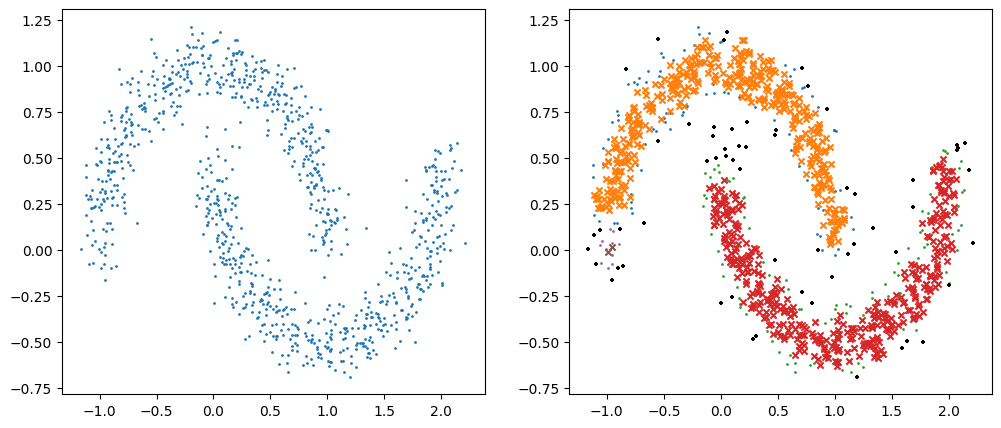

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 构造数据
X,y=make_moons(n_samples=1000, noise=0.1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],s=1)

# DBSCAN模型
# esp是半径，min_samples是minPts
dbscan=DBSCAN(eps=0.1,min_samples=10)
dbscan.fit(X)

# labels_中-1代表离群点
#print(dbscan.labels_)
# 返回核心点的下标
#print(dbscan.core_sample_indices_)



plt.subplot(1,2,2)
for label in range(0,len(np.unique(dbscan.labels_))):
    X_same_label=X[dbscan.labels_==label]
    plt.scatter(X_same_label[:,0],X_same_label[:,1],s=1)
    X_core_label = X[dbscan.core_sample_indices_][dbscan.labels_[dbscan.core_sample_indices_] == label]
    plt.scatter(X_core_label[:,0],X_core_label[:,1],s=20,marker='x')
    
# 离群点画图
X_same_label=X[dbscan.labels_==-1]
plt.scatter(X_same_label[:,0],X_same_label[:,1],s=10,marker='+',color='black')
plt.show()

## 优点
1. 不需要指定簇点个数
2. 可以发现任意形状的簇
3. 擅长寻找噪声点
4. 参数少
## 缺点
1. 对于高维数据效果不好
2. sklearn中速度慢，适合小数据量
3. 参数难以确定